In [1]:
import sklearn
import statsmodels.api as sm

#%conda install matploblib -y
#%conda install seaborn -y
#%pip install gdown
#%matplotlib inline

import matplotlib.pyplot as plt
import gdown
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv('38502-0001-Data.tsv', sep = '\t')
df

C:\Users\Jun\AppData\Local\Temp\ipykernel_20420\147230392.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('38502-0001-Data.tsv', sep = '\t')


,AI_08,AI_10,V1,V3,V5,V501,V507,V508,V509,SURVEY_VERSION,...,V7099D,V7133D,V7134D,V7135D,V7142D,V7143D,V7144D,V7139D,V7140D,V7141D
0,10001,,2021,1,1.144673,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
1,10002,,2021,1,0.676939,8,2,1,1,4,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
2,10003,,2021,1,0.606877,8,1,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
3,10004,,2021,1,0.601276,8,1,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
4,10005,,2021,1,1.004319,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,,51788,2021,4,0.651717,10,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0
23234,,51789,2021,4,0.672390,10,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
23235,,51790,2021,4,1.451628,10,4,1,1,4,...,0,0,0,0,0,0,0,0,0,0
23236,,51791,2021,4,1.966627,10,2,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.to_csv('./38502-0001-Data.csv')

In [4]:
df0 = pd.read_csv('./38502-0001-Data.csv')

df0 = df0.drop('Unnamed: 0', axis=1)
df0

C:\Users\Jun\AppData\Local\Temp\ipykernel_20420\3114305776.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('./38502-0001-Data.csv')


,AI_08,AI_10,V1,V3,V5,V501,V507,V508,V509,SURVEY_VERSION,...,V7099D,V7133D,V7134D,V7135D,V7142D,V7143D,V7144D,V7139D,V7140D,V7141D
0,10001,,2021,1,1.144673,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
1,10002,,2021,1,0.676939,8,2,1,1,4,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
2,10003,,2021,1,0.606877,8,1,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
3,10004,,2021,1,0.601276,8,1,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
4,10005,,2021,1,1.004319,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,,51788,2021,4,0.651717,10,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0
23234,,51789,2021,4,0.672390,10,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
23235,,51790,2021,4,1.451628,10,4,1,1,4,...,0,0,0,0,0,0,0,0,0,0
23236,,51791,2021,4,1.966627,10,2,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#DATA CLEANING PROCESS

In [6]:
df0['V7814'].value_counts()
df2=df0

In [7]:
drop_temp = df0[df0['V7814'] == -8].index

In [8]:
df2 = df0.drop(drop_temp)

In [9]:
df3 = df2.drop(df2[df2['V7814'] == -9].index)

In [10]:
df3['V7202'].value_counts()

df4=df3

In [11]:
drop_temp1 = df3[df3['V7202'] == -9].index

In [12]:
df4 = df3.drop(drop_temp1)

In [13]:
df5 = df4.drop(df4[df4['V7202'] == 3].index)

In [14]:
df6 = df5.drop(df5[df5['V7234'] == -9].index)

In [15]:
df7 = df6.drop(df6[df6['V7254'] == -9].index)

In [16]:
df8 = df7.drop(df7[df7['V7677'] == -9].index)

In [17]:
df9 = df8.drop(df8[df8['V7106'] == -9].index)

In [18]:
df10 = df9.drop(df9[df9['V7784'] == -9].index)

In [19]:
df11 = df10.drop(df10[df10['V7215'] == -9].index)

In [20]:
df12 = df11.drop(df11[df11['V7216'] == -9].index)

In [21]:
df13 = df12.drop(df12[df12['V1070'] == -9].index)

In [22]:
df13 = df13.drop(df13[df13['V7685'] == -9].index)

In [24]:
df13['fatheredu']=0
df13['motheredu']=0
df13['fentanyl']=0
df13['alcohol']=0
df13['socialuse']=0
df13['socialnews']=0
df13['parentedu']=0
df13['parenttalk']=0

In [25]:
df13.loc[df13['V7215']==4,'fatheredu']=1
df13.loc[df13['V7215']==5,'fatheredu']=1
df13.loc[df13['V7215']==6,'fatheredu']=1

df13.loc[df13['V7215']==7,'fatheredu']=2

df13.loc[df13['V7216']==4,'motheredu']=1
df13.loc[df13['V7216']==5,'motheredu']=1
df13.loc[df13['V7216']==6,'motheredu']=1

df13.loc[df13['V7216']==7,'motheredu']=2

df13.loc[df13['V7814']==2,'fentanyl']=1
df13.loc[df13['V7814']==3,'fentanyl']=1
df13.loc[df13['V7814']==4,'fentanyl']=1
df13.loc[df13['V7814']==5,'fentanyl']=1
df13.loc[df13['V7814']==6,'fentanyl']=1
df13.loc[df13['V7814']==7,'fentanyl']=1

In [26]:
df13.loc[df13['V7106']==2,'alcohol']=1
df13.loc[df13['V7106']==3,'alcohol']=1

df13.loc[df13['V7106']==4,'alcohol']=2
df13.loc[df13['V7106']==5,'alcohol']=2
df13.loc[df13['V7106']==6,'alcohol']=2
df13.loc[df13['V7106']==7,'alcohol']=2


df13.loc[df13['V7685']==2,'socialuse']=1
df13.loc[df13['V7685']==3,'socialuse']=1
df13.loc[df13['V7685']==4,'socialuse']=1

df13.loc[df13['V7685']==5,'socialuse']=2
df13.loc[df13['V7685']==6,'socialuse']=2
df13.loc[df13['V7685']==7,'socialuse']=2


df13.loc[df13['V7677']==2,'socialnews']=1
df13.loc[df13['V7677']==3,'socialnews']=1
df13.loc[df13['V7677']==4,'socialnews']=1

df13.loc[df13['V7677']==5,'socialnews']=2
df13.loc[df13['V7677']==6,'socialnews']=2


df13.loc[df13['fatheredu']==1,'parentedu']=1
df13.loc[df13['motheredu']==1,'parentedu']=1


df13.loc[df13['V7254']==2,'parenttalk']=1
df13.loc[df13['V7254']==3,'parenttalk']=1

df13

,AI_08,AI_10,V1,V3,V5,V501,V507,V508,V509,SURVEY_VERSION,...,V7140D,V7141D,fatheredu,motheredu,fentanyl,alcohol,socialuse,socialnews,parentedu,parenttalk
8,10009,,2021,1,0.689253,8,2,0,1,3,...,-8,-8,0,1,0,1,2,2,1,0
10,10011,,2021,1,0.605433,8,1,0,0,3,...,-8,-8,2,2,0,0,1,2,0,1
43,10044,,2021,1,0.984564,8,3,0,0,3,...,-8,-8,2,2,0,0,0,2,0,1
47,10048,,2021,1,2.004854,8,1,0,1,4,...,-8,-8,2,1,0,0,1,2,1,1
49,10050,,2021,1,0.485782,8,3,0,1,3,...,-8,-8,0,0,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,,13830,2021,1,0.316355,10,3,0,1,4,...,-8,-8,1,1,0,1,1,2,1,1
15277,,13832,2021,1,1.514917,10,3,0,0,3,...,-8,-8,2,0,0,0,1,2,0,1
15278,,13833,2021,1,0.592084,10,2,1,1,3,...,-8,-8,1,0,0,0,1,2,1,1
15283,,13838,2021,1,0.473146,10,3,0,0,3,...,-8,-8,0,0,0,0,1,2,0,1


In [27]:
#FREQUENCY TABLE VALUES

In [28]:
df20 = df13.loc[df13['fentanyl'] == 0]

In [29]:
df20['V7202'].value_counts()

V7202
1    1860
2    1757
Name: count, dtype: int64

In [30]:
df20['V1070'].value_counts()

V1070
2    2559
1     539
3     519
Name: count, dtype: int64

In [31]:
df20['V7234'].value_counts()

V7234
0    2963
1     654
Name: count, dtype: int64

In [32]:
df20['V7784'].value_counts()

V7784
2    3327
1     290
Name: count, dtype: int64

In [33]:
df20['alcohol'].value_counts()

alcohol
0    2781
1     603
2     233
Name: count, dtype: int64

In [34]:
df20['socialuse'].value_counts()

socialuse
1    2370
2     885
0     362
Name: count, dtype: int64

In [35]:
df20['socialnews'].value_counts()

socialnews
2    2968
1     425
0     224
Name: count, dtype: int64

In [36]:
df20['parenttalk'].value_counts()

parenttalk
1    2632
0     985
Name: count, dtype: int64

In [37]:
df20['parentedu'].value_counts()

parentedu
1    2610
0    1007
Name: count, dtype: int64

In [38]:
df20_1 = df13.loc[df13['fentanyl'] == 1]

In [39]:
df20_1['V7202'].value_counts()

V7202
1    7
2    7
Name: count, dtype: int64

In [40]:
df20_1['V1070'].value_counts()

V1070
1    6
2    6
3    2
Name: count, dtype: int64

In [41]:
df20_1['V7234'].value_counts()

V7234
1    8
0    6
Name: count, dtype: int64

In [42]:
df20_1['V7784'].value_counts()

V7784
2    12
1     2
Name: count, dtype: int64

In [43]:
df20_1['alcohol'].value_counts()

alcohol
0    8
1    4
2    2
Name: count, dtype: int64

In [44]:
df20_1['socialuse'].value_counts()

socialuse
1    8
2    5
0    1
Name: count, dtype: int64

In [45]:
df20_1['socialnews'].value_counts()

socialnews
2    12
0     1
1     1
Name: count, dtype: int64

In [46]:
df20_1['parenttalk'].value_counts()

parenttalk
1    9
0    5
Name: count, dtype: int64

In [47]:
df20_1['parentedu'].value_counts()

parentedu
1    13
0     1
Name: count, dtype: int64

In [48]:
df14 = df13.loc[df13['V501'] == 8]

In [49]:
df21 = df14.loc[df14['fentanyl'] == 0]

In [50]:
df21['V7202'].value_counts()

V7202
1    956
2    809
Name: count, dtype: int64

In [51]:
df21['V1070'].value_counts()

V1070
2    1338
1     236
3     191
Name: count, dtype: int64

In [52]:
df21['V7234'].value_counts()

V7234
0    1442
1     323
Name: count, dtype: int64

In [53]:
df21['V7784'].value_counts()

V7784
2    1685
1      80
Name: count, dtype: int64

In [54]:
df21['alcohol'].value_counts()

alcohol
0    1470
1     226
2      69
Name: count, dtype: int64

In [55]:
df21['socialuse'].value_counts()

socialuse
1    1137
2     387
0     241
Name: count, dtype: int64

In [56]:
df21['socialnews'].value_counts()

socialnews
2    1392
1     232
0     141
Name: count, dtype: int64

In [57]:
df21['parenttalk'].value_counts()

parenttalk
1    1276
0     489
Name: count, dtype: int64

In [58]:
df21['parentedu'].value_counts()

parentedu
1    1248
0     517
Name: count, dtype: int64

In [59]:
df21_1 = df14.loc[df14['fentanyl'] == 1]

In [60]:
df21_1['V7202'].value_counts()

V7202
1    4
2    3
Name: count, dtype: int64

In [61]:
df21_1['V1070'].value_counts()

V1070
1    4
2    2
3    1
Name: count, dtype: int64

In [62]:
df21_1['V7234'].value_counts()

V7234
1    4
0    3
Name: count, dtype: int64

In [63]:
df21_1['V7784'].value_counts()

V7784
2    5
1    2
Name: count, dtype: int64

In [64]:
df21_1['alcohol'].value_counts()

alcohol
0    4
1    2
2    1
Name: count, dtype: int64

In [65]:
df21_1['socialuse'].value_counts()

socialuse
1    4
2    2
0    1
Name: count, dtype: int64

In [66]:
df21_1['socialnews'].value_counts()

socialnews
2    5
0    1
1    1
Name: count, dtype: int64

In [67]:
df21_1['parenttalk'].value_counts()

parenttalk
1    4
0    3
Name: count, dtype: int64

In [68]:
df21_1['parentedu'].value_counts()

parentedu
1    6
0    1
Name: count, dtype: int64

In [69]:
df15 = df13.loc[df13['V501'] == 10]

In [70]:
df22 = df15.loc[df15['fentanyl'] == 0]

In [71]:
df22['V7202'].value_counts()

V7202
2    948
1    904
Name: count, dtype: int64

In [72]:
df22['V1070'].value_counts()

V1070
2    1221
3     328
1     303
Name: count, dtype: int64

In [73]:
df22['V7234'].value_counts()

V7234
0    1521
1     331
Name: count, dtype: int64

In [74]:
df22['V7784'].value_counts()

V7784
2    1642
1     210
Name: count, dtype: int64

In [75]:
df22['alcohol'].value_counts()

alcohol
0    1311
1     377
2     164
Name: count, dtype: int64

In [76]:
df22['socialuse'].value_counts()

socialuse
1    1233
2     498
0     121
Name: count, dtype: int64

In [77]:
df22['socialnews'].value_counts()

socialnews
2    1576
1     193
0      83
Name: count, dtype: int64

In [78]:
df22['parenttalk'].value_counts()

parenttalk
1    1356
0     496
Name: count, dtype: int64

In [79]:
df22['parentedu'].value_counts()

parentedu
1    1362
0     490
Name: count, dtype: int64

In [80]:
df22_1 = df15.loc[df15['fentanyl'] == 1]

In [81]:
df22_1['V7202'].value_counts()

V7202
2    4
1    3
Name: count, dtype: int64

In [82]:
df22_1['V1070'].value_counts()

V1070
2    4
1    2
3    1
Name: count, dtype: int64

In [83]:
df22_1['V7234'].value_counts()

V7234
1    4
0    3
Name: count, dtype: int64

In [84]:
df22_1['V7784'].value_counts()

V7784
2    7
Name: count, dtype: int64

In [85]:
df22_1['alcohol'].value_counts()

alcohol
0    4
1    2
2    1
Name: count, dtype: int64

In [86]:
df22_1['socialuse'].value_counts()

socialuse
1    4
2    3
Name: count, dtype: int64

In [87]:
df22_1['socialnews'].value_counts()

socialnews
2    7
Name: count, dtype: int64

In [88]:
df22_1['parenttalk'].value_counts()

parenttalk
1    5
0    2
Name: count, dtype: int64

In [89]:
df22_1['parentedu'].value_counts()

parentedu
1    7
Name: count, dtype: int64

In [101]:
def df_group_stat(df, x):
    grouped = df.groupby([x])
    result = grouped["fentanyl"].agg(['mean', 'min', 'max', 'count'])
    print(result)
    
       
df_group_stat(df13, "V7202")
df_group_stat(df13, "V1070")
df_group_stat(df13, "parentedu")
df_group_stat(df13, "V7234")
df_group_stat(df13, "V7784")
df_group_stat(df13, "alcohol")
df_group_stat(df13, "socialuse")
df_group_stat(df13, "socialnews")
df_group_stat(df13, "parenttalk")

print("=================================================")

df_group_stat(df14, "V7202")
df_group_stat(df14, "V1070")
df_group_stat(df14, "parentedu")
df_group_stat(df14, "V7234")
df_group_stat(df14, "V7784")
df_group_stat(df14, "alcohol")
df_group_stat(df14, "socialuse")
df_group_stat(df14, "socialnews")
df_group_stat(df14, "parenttalk")

print("=================================================")

df_group_stat(df15, "V7202")
df_group_stat(df15, "V1070")
df_group_stat(df15, "parentedu")
df_group_stat(df15, "V7234")
df_group_stat(df15, "V7784")
df_group_stat(df15, "alcohol")
df_group_stat(df15, "socialuse")
df_group_stat(df15, "socialnews")
df_group_stat(df15, "parenttalk")


           mean  min  max  count
V7202                           
1      0.003749    0    1   1867
2      0.003968    0    1   1764
           mean  min  max  count
V1070                           
1      0.011009    0    1    545
2      0.002339    0    1   2565
3      0.003839    0    1    521
               mean  min  max  count
parentedu                           
0          0.000992    0    1   1008
1          0.004956    0    1   2623
           mean  min  max  count
V7234                           
0      0.002021    0    1   2969
1      0.012085    0    1    662
           mean  min  max  count
V7784                           
1      0.006849    0    1    292
2      0.003594    0    1   3339
             mean  min  max  count
alcohol                           
0        0.002868    0    1   2789
1        0.006590    0    1    607
2        0.008511    0    1    235
               mean  min  max  count
socialuse                           
0          0.002755    0    1    363
1    

In [96]:
#GRAPHS

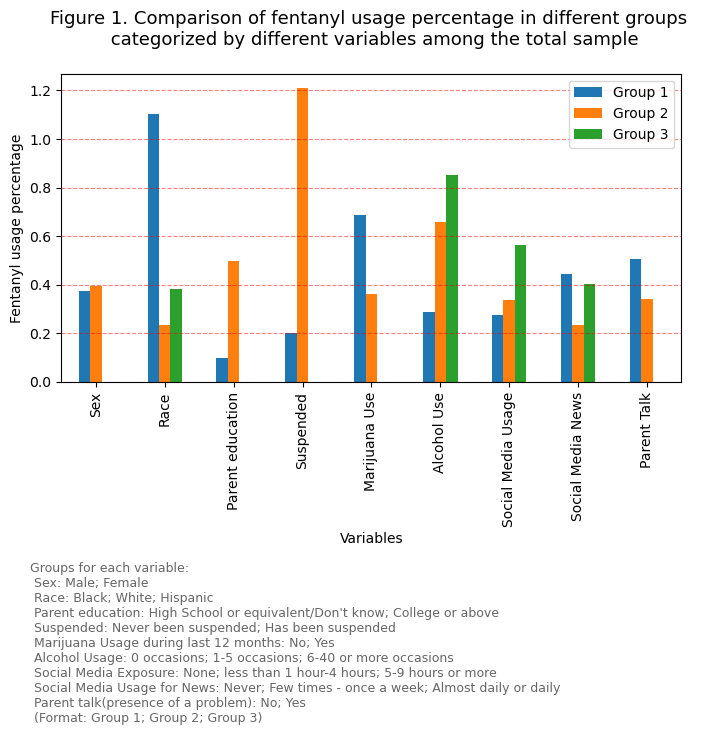

In [97]:
data=[["Sex", 0.3729, 0.3948],
      ["Race", 1.1009, 0.2339, 0.3839],
      ["Parent education", 0.0992, 0.4956],
      ["Suspended", 0.2021, 1.2085],
      ["Marijuana Use", 0.6849, 0.3594],
      ["Alcohol Use", 0.2868, 0.6590, 0.8511],
      ["Social Media Usage", 0.2755, 0.3364, 0.5618],
      ["Social Media News", 0.4444, 0.2347, 0.4027],
      ["Parent Talk", 0.5051, 0.3408]
     ]

Df=pd.DataFrame(data,columns=["Variables", 'Group 1', 'Group 2', 'Group 3'])

Df.plot(x="Variables", y=['Group 1', 'Group 2', 'Group 3'], kind="bar",
 figsize=(8,4))
plt.grid(True, axis = 'y', color='red', alpha=0.5, linestyle='--')
plt.ylabel('Fentanyl usage percentage')
plt.title(label="Figure 1. Comparison of fentanyl usage percentage in different groups \n categorized by different variables among the total sample\n",
          fontsize=13,
          color="black")

plt.annotate("Groups for each variable:\n Sex: Male; Female\n Race: Black; White; Hispanic\n Parent education: High School or equivalent/Don't know; College or above\n Suspended: Never been suspended; Has been suspended\n Marijuana Usage during last 12 months: No; Yes\n Alcohol Usage: 0 occasions; 1-5 occasions; 6-40 or more occasions\n Social Media Exposure: None; less than 1 hour-4 hours; 5-9 hours or more\n Social Media Usage for News: Never; Few times - once a week; Almost daily or daily\n Parent talk(presence of a problem): No; Yes\n (Format: Group 1; Group 2; Group 3)",
            xy = (-0.05, -0.85),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9,
            color="#666666")

plt.show()

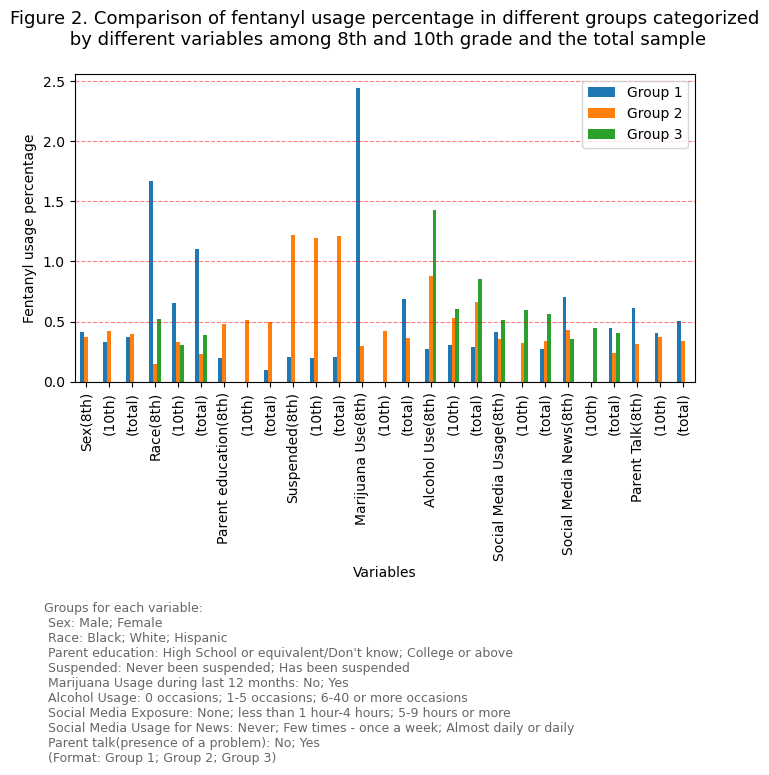

In [99]:
data=[["Sex(8th)", 0.4167, 0.3695],
      ["(10th)", 0.3308, 0.4202],
      ["(total)", 0.3729, 0.3948],
      ["Race(8th)", 1.6667, 0.1493, 0.5208],
      ["(10th)", 0.6557, 0.3265, 0.3040],
      ["(total)", 1.1009, 0.2339, 0.3839],
      ["Parent education(8th)", 0.1931, 0.4785],
      ["(10th)", 0.0000, 0.5113],
      ["(total)", 0.0992, 0.4956],
      ["Suspended(8th)", 0.2076, 1.2232],
      ["(10th)", 0.1969, 1.1940],
      ["(total)", 0.2021, 1.2085],
      ["Marijuana Use(8th)", 2.4390, 0.2959],
      ["(10th)", 0.0000, 0.4245],
      ["(total)", 0.6849, 0.3594],
      ["Alcohol Use(8th)", 0.2714, 0.8772, 1.4286],
      ["(10th)", 0.3042, 0.5277, 0.6061],
      ["(total)", 0.2868, 0.6590, 0.8511],
      ["Social Media Usage(8th)", 0.4132, 0.3506, 0.5141],
      ["(10th)", 0.0000, 0.3234, 0.5988],
      ["(total)", 0.2755, 0.3364, 0.5618],
      ["Social Media News(8th)", 0.7042, 0.4292, 0.3579],
      ["(10th)", 0.0000, 0.0000, 0.4422],
      ["(total)", 0.4444, 0.2347, 0.4027],
      ["Parent Talk(8th)", 0.6098, 0.3125],
      ["(10th)", 0.4016, 0.3674],
      ["(total)", 0.5051, 0.3408]
     ]

Df=pd.DataFrame(data,columns=["Variables", 'Group 1', 'Group 2', 'Group 3'])

Df.plot(x="Variables", y=['Group 1', 'Group 2', 'Group 3'], kind="bar",
 figsize=(8,4))
plt.grid(True, axis = 'y', color='red', alpha=0.5, linestyle='--')
plt.ylabel('Fentanyl usage percentage')
plt.title(label="Figure 2. Comparison of fentanyl usage percentage in different groups categorized\n by different variables among 8th and 10th grade and the total sample\n",
          fontsize=13,
          color="black")

plt.annotate("Groups for each variable:\n Sex: Male; Female\n Race: Black; White; Hispanic\n Parent education: High School or equivalent/Don't know; College or above\n Suspended: Never been suspended; Has been suspended\n Marijuana Usage during last 12 months: No; Yes\n Alcohol Usage: 0 occasions; 1-5 occasions; 6-40 or more occasions\n Social Media Exposure: None; less than 1 hour-4 hours; 5-9 hours or more\n Social Media Usage for News: Never; Few times - once a week; Almost daily or daily\n Parent talk(presence of a problem): No; Yes\n (Format: Group 1; Group 2; Group 3)",
            xy = (-0.05, -0.98),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9,
            color="#666666")

plt.show()

Text(0, 0.5, 'Social Media usage For News')

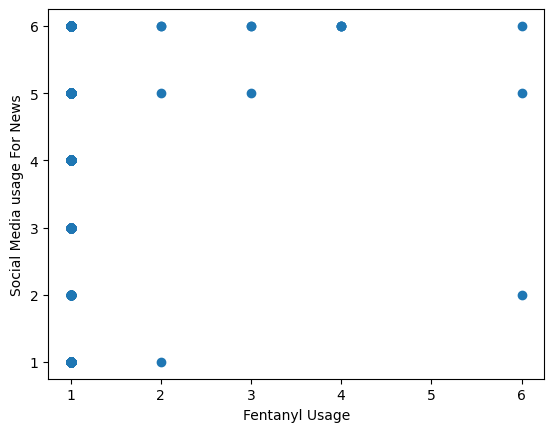

In [101]:
X = df13['V7814'].values
Y = df13['V7677'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media usage For News')

Text(0, 0.5, 'Social Media Usage')

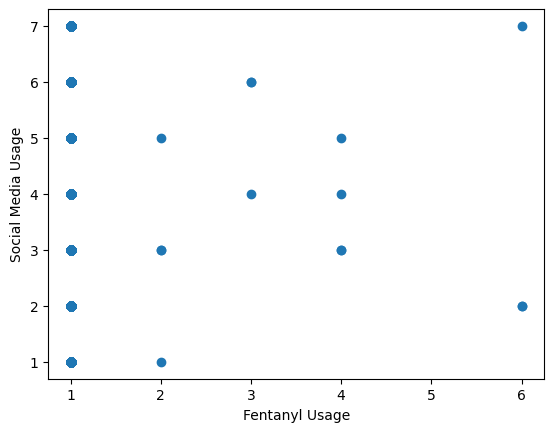

In [102]:
X = df13['V7814'].values
Y = df13['V7685'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media Usage')

Text(0, 0.5, 'Social Media usage For News')

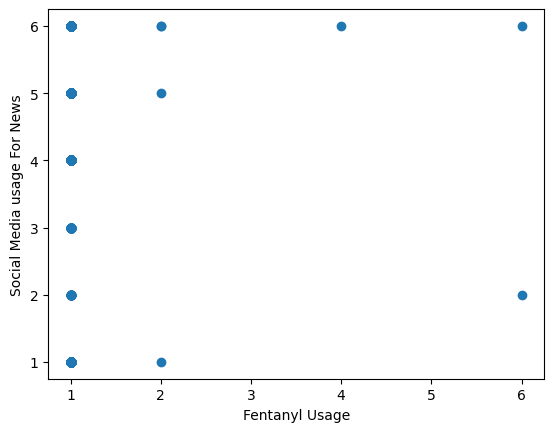

In [103]:
X = df14['V7814'].values
Y = df14['V7677'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media usage For News')

Text(0, 0.5, 'Social Media Usage')

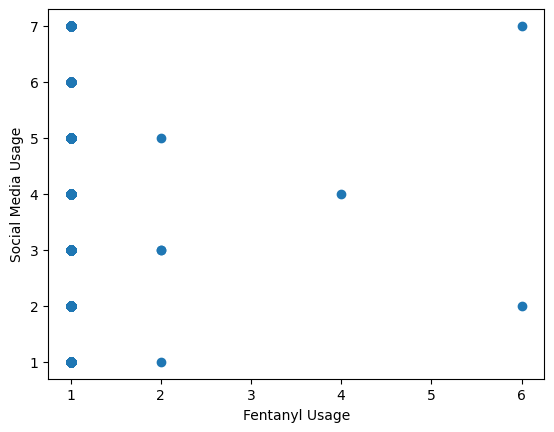

In [104]:
X = df14['V7814'].values
Y = df14['V7685'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media Usage')

Text(0, 0.5, 'Social Media usage For News')

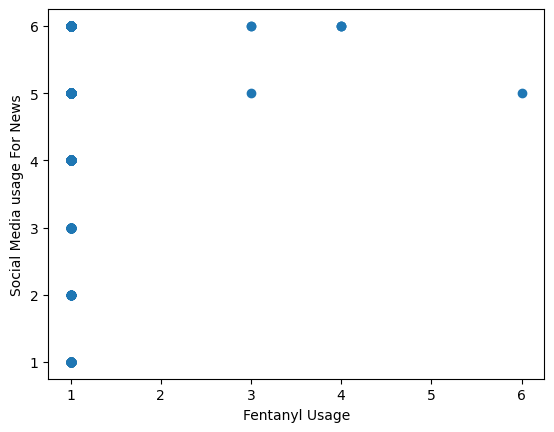

In [105]:
X = df15['V7814'].values
Y = df15['V7677'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media usage For News')

Text(0, 0.5, 'Social Media Usage')

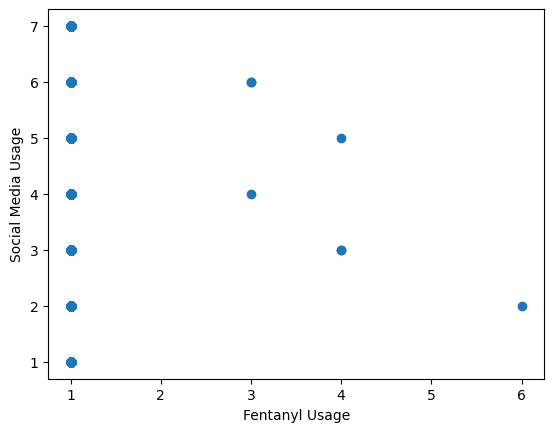

In [106]:
X = df15['V7814'].values
Y = df15['V7685'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Social Media Usage')

Text(0, 0.5, 'Marijuana Usage')

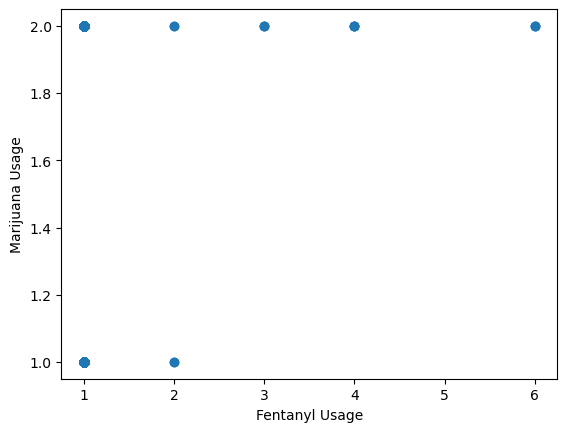

In [107]:
X = df13['V7814'].values
Y = df13['V7784'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Marijuana Usage')

Text(0, 0.5, 'Marijuana Usage')

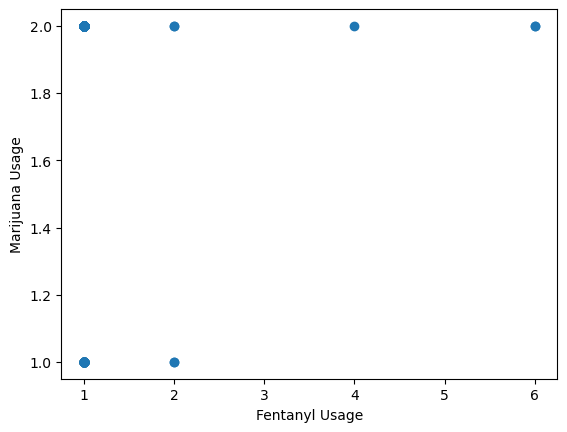

In [108]:
X = df14['V7814'].values
Y = df14['V7784'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Marijuana Usage')

Text(0, 0.5, 'Marijuana Usage')

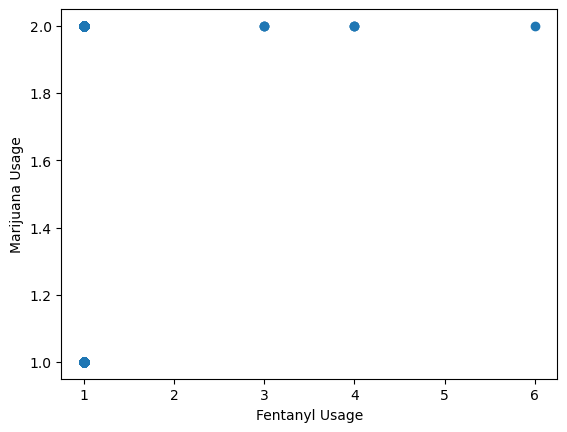

In [109]:
X = df15['V7814'].values
Y = df15['V7784'].values

stats.spearmanr(X, Y)

plt.scatter(X, Y)
plt.xlabel('Fentanyl Usage')
plt.ylabel('Marijuana Usage')

In [110]:
#LOGISTIC REGRESSION ANALSIS

In [111]:
df16 = pd.DataFrame(columns = ['fentanyl', 'socialuse', 'V1070', 'V7234'])
for i in range(len(df13[['fentanyl']])):
    df16.loc[i] = [df13['fentanyl'].iloc[i],
                   df13['socialuse'].iloc[i],
                   df13['V1070'].iloc[i],
                   df13['V7234'].iloc[i]
                  ]

In [112]:
df_temp= pd.get_dummies(df16, columns = ['socialuse'], drop_first = True)
df_temp

,fentanyl,V1070,V7234,socialuse_1,socialuse_2
0,0,2,0,0,1
1,0,2,0,1,0
2,0,1,1,0,0
3,0,1,1,1,0
4,0,2,0,1,0
...,...,...,...,...,...
3626,0,2,0,1,0
3627,0,1,0,1,0
3628,0,3,0,1,0
3629,0,1,1,1,0


In [113]:
model_df = sm.Logit.from_formula("fentanyl ~ socialuse_1 + socialuse_2", df_temp)
result_df = model_df.fit()
print(result_df.summary())

Optimization terminated successfully.
         Current function value: 0.025153
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               fentanyl   No. Observations:                 3631
Model:                          Logit   Df Residuals:                     3628
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                0.004977
Time:                        16:04:43   Log-Likelihood:                -91.331
converged:                       True   LL-Null:                       -91.788
Covariance Type:            nonrobust   LLR p-value:                    0.6333
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.8916      1.001     -5.884      0.000      -7.854      -3.929
socialuse_1     0.2004   

In [114]:
model_odds = pd.DataFrame(np.exp(result_df.params), columns = ["Odd Ratio"])
model_odds['Z-Value'] = result_df.pvalues
model_odds[["2.5%", "97.5%"]]=np.exp(result_df.conf_int())

print(model_odds)

             Odd Ratio       Z-Value      2.5%      97.5%
Intercept     0.002762  4.016233e-09  0.000388   0.019664
socialuse_1   1.221941  8.503199e-01  0.152383   9.798569
socialuse_2   2.045198  5.143384e-01  0.238111  17.566729


In [115]:
df_temp_1 = pd.get_dummies(df16, columns = ['socialuse', 'V1070', 'V7234'], drop_first = True)
df_temp_1

,fentanyl,socialuse_1,socialuse_2,V1070_2,V1070_3,V7234_1
0,0,0,1,1,0,0
1,0,1,0,1,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,1,0,0
...,...,...,...,...,...,...
3626,0,1,0,1,0,0
3627,0,1,0,0,0,0
3628,0,1,0,0,1,0
3629,0,1,0,0,0,1


In [116]:
model_df_1 = sm.Logit.from_formula("fentanyl ~ socialuse_1 + socialuse_2 + V1070_2 + V1070_3 + V7234_1", df_temp_1)
result_df_1 = model_df_1.fit()
print(result_df_1.summary())

Optimization terminated successfully.
         Current function value: 0.023363
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               fentanyl   No. Observations:                 3631
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                 0.07578
Time:                        16:04:52   Log-Likelihood:                -84.832
converged:                       True   LL-Null:                       -91.788
Covariance Type:            nonrobust   LLR p-value:                   0.01618
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.5298      1.139     -4.855      0.000      -7.762      -3.298
socialuse_1     0.1181   

In [117]:
model_odds_1 = pd.DataFrame(np.exp(result_df_1.params), columns = ["Odd Ratio"])
model_odds_1['Z-Value'] = result_df_1.pvalues
model_odds_1[["2.5%", "97.5%"]]=np.exp(result_df_1.conf_int())

print(model_odds_1)

             Odd Ratio   Z-Value      2.5%      97.5%
Intercept     0.003967  0.000001  0.000426   0.036975
socialuse_1   1.125386  0.911696  0.139517   9.077726
socialuse_2   1.331422  0.796325  0.151464  11.703666
V1070_2       0.340583  0.078258  0.102698   1.129498
V1070_3       0.499961  0.405072  0.097773   2.556535
V7234_1       4.554212  0.007610  1.495877  13.865348


In [118]:
df17 = pd.DataFrame(columns = ['fentanyl', 'socialnews', 'V1070', 'V7234'])
for i in range(len(df13[['fentanyl']])):
    df17.loc[i] = [df13['fentanyl'].iloc[i],
                   df13['socialnews'].iloc[i],
                   df13['V1070'].iloc[i],
                   df13['V7234'].iloc[i]
                  ]

In [119]:
df_temp1 = pd.get_dummies(df17, columns = ['socialnews'], drop_first = True)
df_temp1

,fentanyl,V1070,V7234,socialnews_1,socialnews_2
0,0,2,0,0,1
1,0,2,0,0,1
2,0,1,1,0,1
3,0,1,1,0,1
4,0,2,0,0,1
...,...,...,...,...,...
3626,0,2,0,0,1
3627,0,1,0,0,1
3628,0,3,0,0,1
3629,0,1,1,0,1


In [120]:
model_df1 = sm.Logit.from_formula("fentanyl ~ socialnews_1 + socialnews_2", df_temp1)
result_df1 = model_df1.fit()
print(result_df1.summary())

Optimization terminated successfully.
         Current function value: 0.025233
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               fentanyl   No. Observations:                 3631
Model:                          Logit   Df Residuals:                     3628
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                0.001827
Time:                        16:05:01   Log-Likelihood:                -91.620
converged:                       True   LL-Null:                       -91.788
Covariance Type:            nonrobust   LLR p-value:                    0.8456
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.4116      1.002     -5.400      0.000      -7.376      -3.447
socialnews_1    -0.640

In [121]:
model_odds1 = pd.DataFrame(np.exp(result_df1.params), columns = ["Odd Ratio"])
model_odds1['Z-Value'] = result_df1.pvalues
model_odds1[["2.5%", "97.5%"]]=np.exp(result_df1.conf_int())

print(model_odds1)

              Odd Ratio       Z-Value      2.5%     97.5%
Intercept      0.004464  6.678712e-08  0.000626  0.031831
socialnews_1   0.527059  6.512028e-01  0.032812  8.466223
socialnews_2   0.905660  9.243202e-01  0.117232  6.996568


In [122]:
df_temp1_1 = pd.get_dummies(df17, columns = ['socialnews', 'V1070', 'V7234'], drop_first = True)
df_temp1_1

,fentanyl,socialnews_1,socialnews_2,V1070_2,V1070_3,V7234_1
0,0,0,1,1,0,0
1,0,0,1,1,0,0
2,0,0,1,0,0,1
3,0,0,1,0,0,1
4,0,0,1,1,0,0
...,...,...,...,...,...,...
3626,0,0,1,1,0,0
3627,0,0,1,0,0,0
3628,0,0,1,0,1,0
3629,0,0,1,0,0,1


In [123]:
model_df1_1 = sm.Logit.from_formula("fentanyl ~ socialnews_1 + socialnews_2 + V1070_2 + V1070_3 + V7234_1", df_temp1_1)
result_df1_1 = model_df1_1.fit(method='cg', maxiter=50)
print(result_df1_1.summary())

Optimization terminated successfully.
         Current function value: 0.023333
         Iterations: 26
         Function evaluations: 131
         Gradient evaluations: 131
                           Logit Regression Results                           
Dep. Variable:               fentanyl   No. Observations:                 3631
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                 0.07697
Time:                        16:05:07   Log-Likelihood:                -84.723
converged:                       True   LL-Null:                       -91.788
Covariance Type:            nonrobust   LLR p-value:                   0.01481
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.9400      1.1

In [124]:
model_odds1_1 = pd.DataFrame(np.exp(result_df1_1.params), columns = ["Odd Ratio"])
model_odds1_1['Z-Value'] = result_df1_1.pvalues
model_odds1_1[["2.5%", "97.5%"]]=np.exp(result_df1_1.conf_int())

print(model_odds1_1)

              Odd Ratio   Z-Value      2.5%      97.5%
Intercept      0.007155  0.000016  0.000759   0.067415
socialnews_1   0.452858  0.574571  0.028491   7.198055
socialnews_2   0.666191  0.698994  0.085010   5.220689
V1070_2        0.329280  0.067704  0.100003   1.084221
V1070_3        0.489266  0.389331  0.096093   2.491136
V7234_1        4.639112  0.006798  1.527000  14.093879
